In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/train.csv")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
#Data Cleaning
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df['Postal Code'].isnull().sum()


np.int64(11)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [ ]:
#create time features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Month_Name'] = df['Order Date'].dt.month_name()

df[['Order Date', 'Order_Year', 'Order_Month', 'Order_Month_Name']].head()


,Order Date,Order_Year,Order_Month,Order_Month_Name
0,2017-11-08,2017,11,November
1,2017-11-08,2017,11,November
2,2017-06-12,2017,6,June
3,2016-10-11,2016,10,October
4,2016-10-11,2016,10,October


In [ ]:
df.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Order_Year,Order_Month
count,9800.000000,9800,9800,9789.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059,2016.724184,7.818469
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,2015.000000,1.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000,2016.000000,5.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000,2017.000000,9.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000,2018.000000,11.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,2018.000000,12.000000
std,2829.160653,NaN,NaN,32041.223413,626.651875,1.123984,3.281905


In [ ]:
df[df['Sales'] < 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month,Order_Month_Name


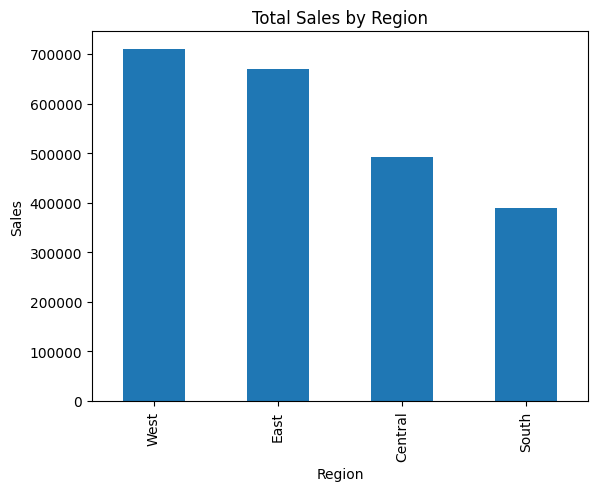

In [ ]:
#First EDA -Sales by Region

import matplotlib.pyplot as plt
import seaborn as sns

region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure()
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


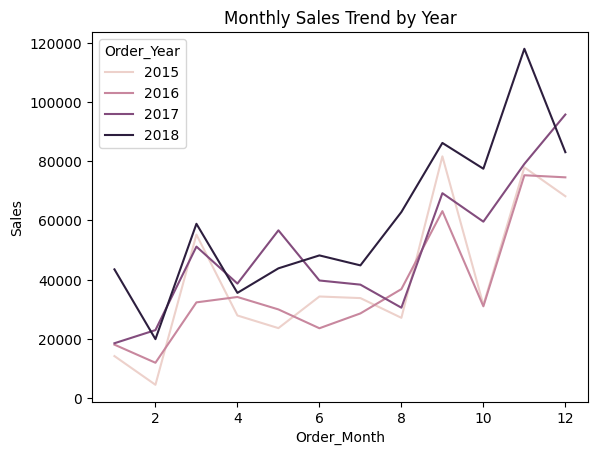

In [ ]:
#Monthly Sales Trend

monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()

plt.figure()
sns.lineplot(data=monthly_sales, x='Order_Month', y='Sales', hue='Order_Year')
plt.title('Monthly Sales Trend by Year')
plt.show()

In [ ]:
#Profit Analysis

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order_Year', 'Order_Month',
       'Order_Month_Name'],
      dtype='object')

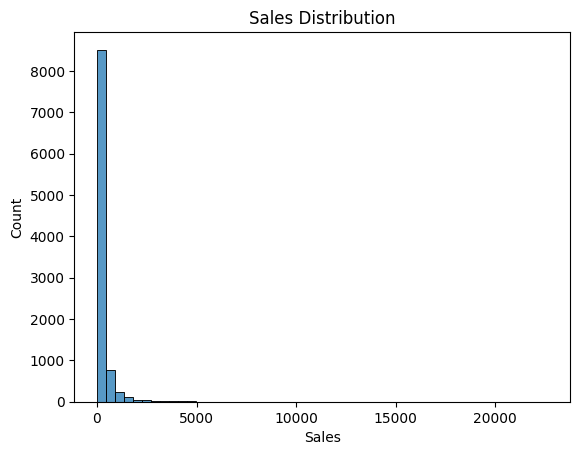

In [ ]:
#Sales vs Profit Relationship
plt.figure()
sns.histplot(df['Sales'], bins=50)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()


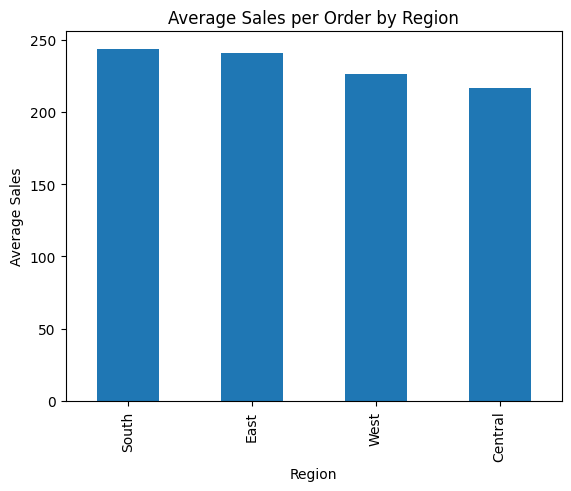

In [ ]:
#Average Sales per Order
avg_sales = df.groupby('Region')['Sales'].mean().sort_values(ascending=False)

plt.figure()
avg_sales.plot(kind='bar')
plt.title('Average Sales per Order by Region')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
#High-Value Orders Analysis
high_value = df[df['Sales'] > df['Sales'].quantile(0.95)]
high_value.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month,Order_Month_Name
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,2015,6,June
24,25,CA-2016-106320,2016-09-25,2016-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,2016,9,September
27,28,US-2016-150630,2016-09-17,2016-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,2016,9,September
35,36,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,2017,12,December
54,55,CA-2017-105816,2017-12-11,2017-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,10024.0,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950,2017,12,December


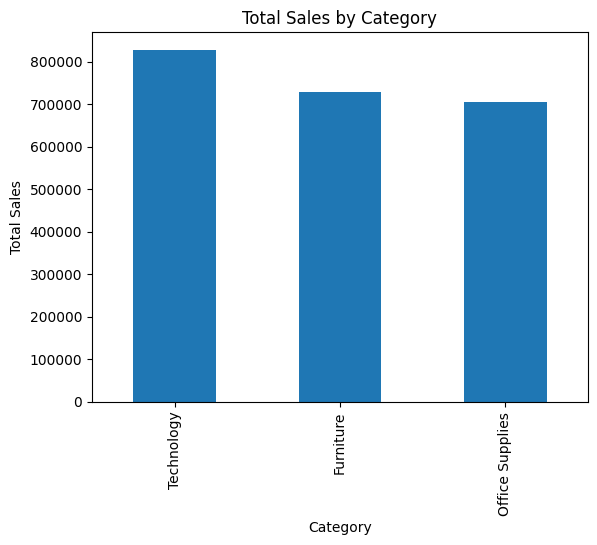

In [ ]:
#Total Sales by Category
import matplotlib.pyplot as plt
import seaborn as sns

category_sales = (
    df.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


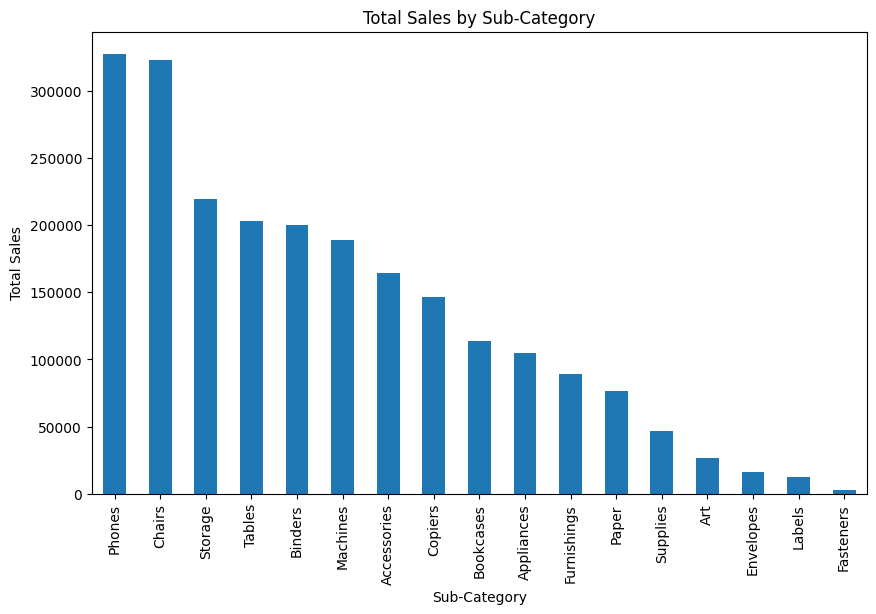

In [ ]:
#Total Sales by Sub-Category
subcat_sales = (
    df.groupby('Sub-Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
subcat_sales.plot(kind='bar')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


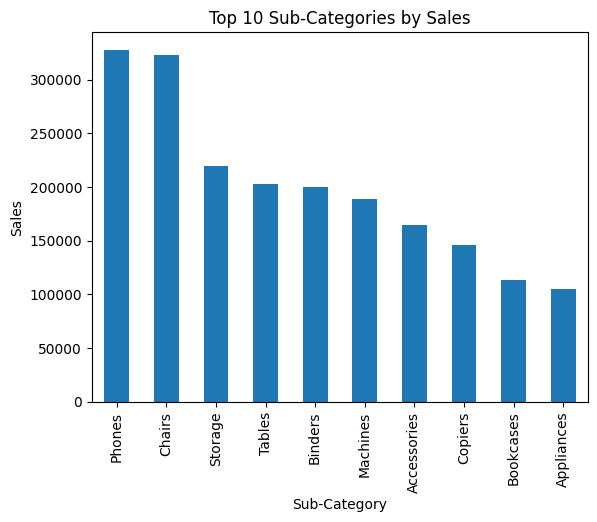

In [ ]:
#Top 10 Sub-Categories by Sales
top_10_subcat = subcat_sales.head(10)

plt.figure()
top_10_subcat.plot(kind='bar')
plt.title('Top 10 Sub-Categories by Sales')
plt.ylabel('Sales')
plt.show()


In [ ]:
#pivot table
region_category_sales = pd.pivot_table(
    df,
    values='Sales',
    index='Region',
    columns='Category',
    aggfunc='sum'
)

region_category_sales

Category,Furniture,Office Supplies,Technology
Region,,,
Central,160317.4622,163590.243,168739.208
East,206461.3880,199940.811,263116.527
South,116531.4800,124424.771,148195.208
West,245348.2455,217466.509,247404.930


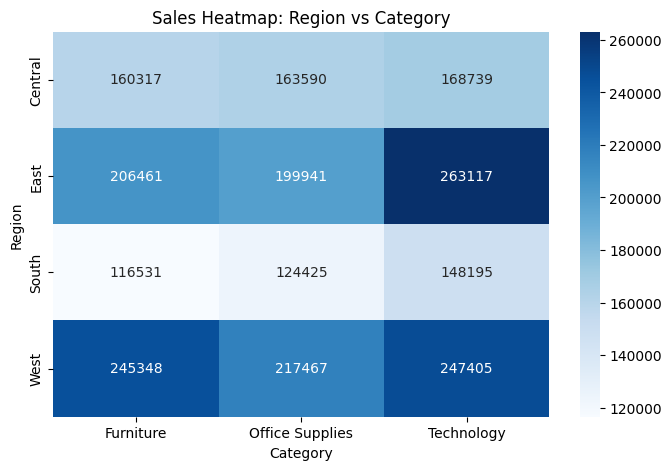

In [ ]:
#plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(region_category_sales, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales Heatmap: Region vs Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

### Customer Segment Analysis

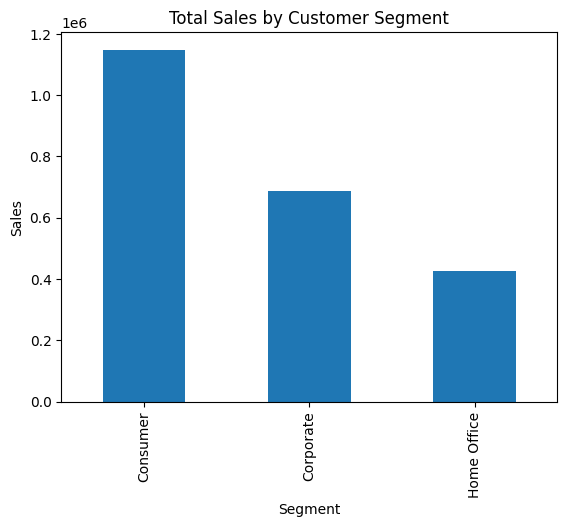

In [ ]:
#Sales by Customer Segment
segment_sales = (
    df.groupby('Segment')['Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
segment_sales.plot(kind='bar')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Rename Columns
df_sql = df.rename(columns={
    'Row ID': 'row_id',
    'Order ID': 'order_id',
    'Order Date': 'order_date',
    'Ship Date': 'ship_date',
    'Ship Mode': 'ship_mode',
    'Customer ID': 'customer_id',
    'Customer Name': 'customer_name',
    'Postal Code': 'postal_code',
    'Product ID': 'product_id',
    'Sub-Category': 'sub_category',
    'Product Name': 'product_name'
})


In [ ]:
#export csv
df_sql.to_csv('cleaned_sales_data.csv', index=False)
